In [34]:
import numpy as np
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_combined = pd.read_csv("dataset/merged_df.csv")
df_combined

,chdrnum,agntnum,securityno,occdate,annual_premium,product,flg_inforce,flg_lapsed,flg_expire,product_grp,...,pct_AG03_25to29,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_product_expertise
0,PID:4,AIN:0,CIN:1677,2020-06-15,1187.0,prod_8,1.0,0.0,0.0,PG:0,...,0.084261,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9']
1,PID:2,AIN:0,CIN:2974,2020-06-11,144.0,prod_8,0.0,1.0,0.0,PG:0,...,0.084261,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9']
2,PID:11,AIN:0,CIN:3570,2021-04-07,48.0,prod_8,0.0,1.0,0.0,PG:0,...,0.084261,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9']
3,PID:10,AIN:0,CIN:5147,2020-06-11,480.0,prod_8,1.0,0.0,0.0,PG:0,...,0.084261,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9']
4,PID:5,AIN:0,CIN:7339,2020-04-07,0.0,prod_6,1.0,0.0,0.0,PG:0,...,0.084261,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29643,NaN,NaN,CIN:8098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29644,NaN,NaN,CIN:9384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29645,NaN,NaN,CIN:9626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29646,NaN,NaN,CIN:9794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_combined_means = df_combined.groupby('product')['age'].mean().reset_index()
df_combined_median = df_combined.groupby('product')['age'].median().reset_index()
print(df_combined_means)
print(df_combined_median)


  product        age
0  prod_0  74.000000
1  prod_2  54.784785
2  prod_4  55.503226
3  prod_6  45.907306
4  prod_7  44.144105
5  prod_8  42.515304
6  prod_9  49.172657
  product   age
0  prod_0  72.0
1  prod_2  53.0
2  prod_4  56.0
3  prod_6  45.0
4  prod_7  43.0
5  prod_8  42.0
6  prod_9  49.0


In [11]:
# Find the mean of the premium per policy

df_combined['mean_prem_cnvt'] = df_combined['annual_premium_cnvrt'] / df_combined['cnt_converted']
df_combined

,chdrnum,agntnum,securityno,occdate,annual_premium,product,flg_inforce,flg_lapsed,flg_expire,product_grp,...,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_product_expertise,mean_prem_cnvt
0,PID:4,AIN:0,CIN:1677,2020-06-15,1187.0,prod_8,1.0,0.0,0.0,PG:0,...,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],326.914626
1,PID:2,AIN:0,CIN:2974,2020-06-11,144.0,prod_8,0.0,1.0,0.0,PG:0,...,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],326.914626
2,PID:11,AIN:0,CIN:3570,2021-04-07,48.0,prod_8,0.0,1.0,0.0,PG:0,...,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],326.914626
3,PID:10,AIN:0,CIN:5147,2020-06-11,480.0,prod_8,1.0,0.0,0.0,PG:0,...,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],326.914626
4,PID:5,AIN:0,CIN:7339,2020-04-07,0.0,prod_6,1.0,0.0,0.0,PG:0,...,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],326.914626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29643,NaN,NaN,CIN:8098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29644,NaN,NaN,CIN:9384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29645,NaN,NaN,CIN:9626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29646,NaN,NaN,CIN:9794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# normalize mean_prem_cnvt
df_combined['mean_prem_cnvt_normalized'] = (df_combined['mean_prem_cnvt'] - df_combined['mean_prem_cnvt'].min()) / (df_combined['mean_prem_cnvt'].max() - df_combined['mean_prem_cnvt'].min())

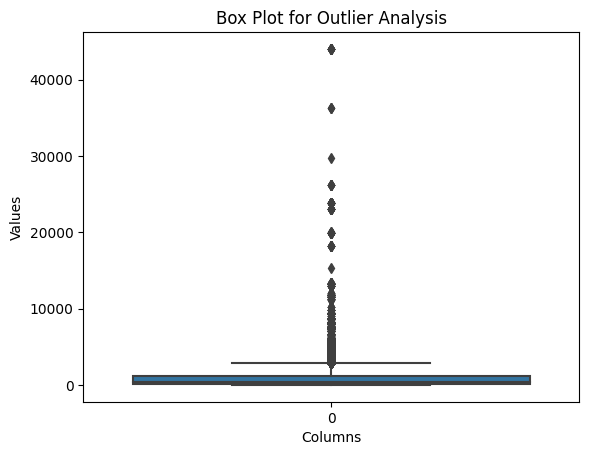

In [36]:
#Boxplot

sns.boxplot(data= df_combined['cnt_converted'])

# Adding labels and title
plt.title('Box Plot for Outlier Analysis')
plt.ylabel('Values')
plt.xlabel('Columns')

# Show plot
plt.show()

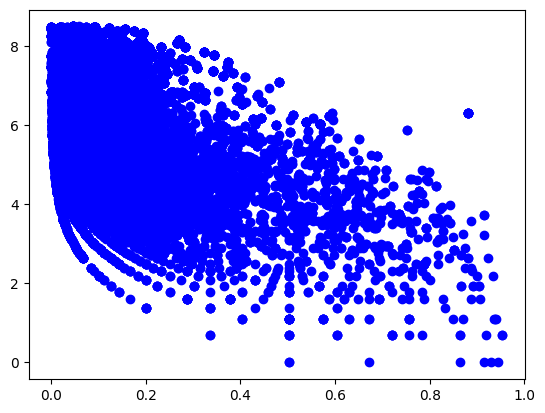

-0.38090617943716887


In [54]:
filtered_df = df_combined[df_combined['cnt_converted'] < 5000]
filtered_df = filtered_df[filtered_df['pct_cancel'] > 0]

plt.scatter((filtered_df['pct_cancel']), np.log(filtered_df['cnt_converted']), color='blue', label='Data points')
plt.show()

correlation = ((filtered_df['pct_cancel'])).corr(np.log(filtered_df['cnt_converted']))
print(correlation)

In [4]:
df_diffcust = pd.read_csv('dataset/diff_cus.csv')
df_diffcust

,Unnamed: 0,chdrnum,agntnum,securityno,occdate,annual_premium,product,flg_inforce,flg_lapsed,flg_expire,...,pct_AG03_25to29,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_product_expertise
0,7920,PID:10451,AIN:2520,CIN:10017,2021-01-15,0.0,prod_4,1.0,0.0,0.0,...,0.225941,0.259414,0.150628,0.276151,0.008368,0.033473,0.004184,0.041841,5.0,['prod_6']
1,7921,PID:10452,AIN:2521,CIN:10017,2021-11-23,19.0,prod_8,1.0,0.0,0.0,...,0.010949,0.368613,0.339416,0.087591,0.131387,0.040146,0.021898,0.000000,1.0,['prod_4' 'prod_7' 'prod_9' 'prod_4']
2,9662,PID:11953,AIN:2951,CIN:1003,2022-10-26,10000.0,prod_9,1.0,0.0,0.0,...,0.042781,0.195856,0.423128,0.168449,0.078209,0.023396,0.016043,0.008021,1.0,['prod_8' 'prod_9' 'prod_9' 'prod_4']
3,9663,PID:11952,AIN:2951,CIN:1003,2022-07-28,132.0,prod_8,1.0,0.0,0.0,...,0.042781,0.195856,0.423128,0.168449,0.078209,0.023396,0.016043,0.008021,1.0,['prod_8' 'prod_9' 'prod_9' 'prod_4']
4,9661,PID:11950,AIN:2951,CIN:1003,2022-10-17,181.0,prod_8,0.0,1.0,0.0,...,0.042781,0.195856,0.423128,0.168449,0.078209,0.023396,0.016043,0.008021,1.0,['prod_8' 'prod_9' 'prod_9' 'prod_4']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5270,20441,PID:21280,AIN:6213,CIN:9987,2015-05-30,0.0,prod_4,1.0,0.0,0.0,...,0.052536,0.077899,0.135870,0.155797,0.137681,0.092391,0.143116,0.168478,4.0,['prod_8' 'prod_7' 'prod_2']
5271,20442,PID:21281,AIN:6214,CIN:9987,2015-01-26,552.0,prod_2,1.0,0.0,0.0,...,0.136364,0.056818,0.306818,0.170455,0.136364,0.034091,0.034091,0.056818,6.0,['prod_7' 'prod_4' 'prod_6' 'prod_4' 'prod_8' ...
5272,5184,PID:8181,AIN:1932,CIN:9997,2023-04-25,179.0,prod_6,1.0,0.0,0.0,...,0.111111,0.155556,0.066667,0.150000,0.194444,0.138889,0.072222,0.033333,6.0,['prod_4' 'prod_9' 'prod_7' 'prod_9' 'prod_6' ...
5273,5178,PID:8180,AIN:1930,CIN:9997,2023-11-20,389.0,prod_6,1.0,0.0,0.0,...,0.046729,0.394860,0.259346,0.165888,0.067757,0.022196,0.011682,0.003505,1.0,['prod_0' 'prod_0' 'prod_7' 'prod_4']


In [9]:
df_noob = pd.read_csv('dataset/noob_agnt_details.csv')
df_noob

,Unnamed: 0,agntnum,change_count,pct_cancel,pct_inforce
0,0,AIN:0,1,0.190806,0.583466
1,1,AIN:1,1,0.011850,0.642857
2,2,AIN:1002,1,0.250518,0.895020
3,3,AIN:1004,2,0.009390,0.742087
4,4,AIN:1005,1,0.022737,0.926097
...,...,...,...,...,...
1687,1687,AIN:985,1,0.047512,0.668317
1688,1688,AIN:9867,1,0.000000,0.000000
1689,1689,AIN:990,1,0.112484,0.540952
1690,1690,AIN:993,1,0.122972,0.644374
